In [164]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.gaussian_process as skg
from scipy.special import erf, erfc
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

In [165]:
lam = 1e-2
l = 1
kernel = ConstantKernel(1.0, constant_value_bounds="fixed") * RBF(l, length_scale_bounds="fixed")
gpa = skg.GaussianProcessRegressor(
    alpha=lam,
    kernel=kernel
)

In [197]:
def f(X):
    v = X[:,0]
    w = X[:,1]
    return np.log(1/v+1/w)-1

In [167]:
vv = np.arange(0.01,3,0.01)
ww = vv.copy()
n = len(vv)

In [168]:
V,W = np.meshgrid(vv,ww)
Xg = np.hstack((
    np.reshape(V,[-1,1]),
    np.reshape(W,[-1,1])
))
yg = f(Xg)
im = np.reshape(yg, (n,n))

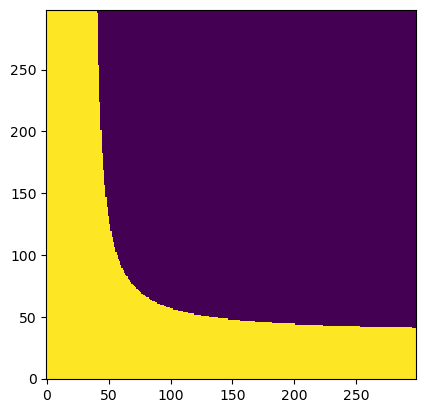

In [169]:
plt.imshow(
    im>0,
    origin='lower'
)

In [170]:
def gpa_next(gpa,x,y):

    n = gpa.X_train_.shape[1]
    g = skg.GaussianProcessRegressor(
        alpha=1e-6,
        kernel=kernel
    )
    g.fit(
        np.vstack((gpa.X_train_, np.array(x).reshape(-1,n))),
        np.vstack((gpa.y_train_, np.array(y).reshape(-1,1)))
    )
    # print(g.X_train_)
    return g

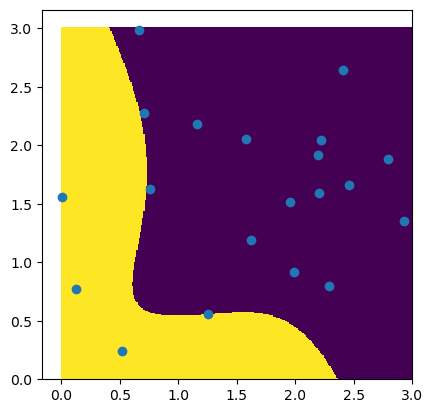

In [171]:
X = np.array([[1,1]])
X = np.random.rand(20,2)*3
y = f(X)

gpa.fit(X,y)

ygp = gpa.predict(Xg)
imgp = np.reshape(ygp, (n,n))

plt.imshow(
    imgp>0,
    origin='lower',
    extent=[0,3,0,3]
)
plt.scatter(*X.T)

In [201]:
X = np.array([[1,1]])
y = f(X)

gpa.fit(X,y)

# delta = np.hstack((
#     np.reshape(np.array([0.1]*8),[-1,1]),
#     np.reshape(np.arange(0,2*np.pi,np.pi/4),[-1,1])
# ))
r = np.reshape(np.array([0.1]*8),[-1,1])
th = np.reshape(np.arange(0,2*np.pi,np.pi/4),[-1,1])

dx = r*np.cos(th)
dy = r*np.sin(th)

delta = np.hstack((
    dx,
    dy
))

for i in range(20):

    pe_arr = []
    for d in delta:
        gp_step = gpa_next(gpa, X[-1,:]+d, gpa.predict(np.reshape(X[-1]+d,[1,-1])))
        mu,sig = gp_step.predict(Xg, return_std=True)
        Pe = erfc(np.abs(mu)/(np.sqrt(2)*sig))
        pe_arr.append(np.sum(Pe))
    pe_arr = np.array(pe_arr)
    dmin = delta[np.argmin(pe_arr),:]
    print(dmin)

    X = np.vstack((
        X,
        X[-1]+np.reshape(dmin,[1,-1])
    ))
    
    y = f(X)
    gpa.fit(X,y)
    
    print(X)
    # print(y)
    

ygp = gpa.predict(Xg)
imgp = np.reshape(ygp, (n,n))

plt.imshow(
    imgp>0,
    origin='lower',
    extent=[0,3,0,3]
)
plt.scatter(*X.T)

[-0.07071068 -0.07071068]
[[1.         1.        ]
 [0.92928932 0.92928932]]


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2 and the array at index 1 has size 1